In [4]:
from IPython.display import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re
import pandas as pd
import numpy as np

## Simple Linear Regression and Predicting Life Expectancy

A linear regression model attempts to explain the relationship between two or more variables using a straight line. ReliaSoft’s Experiment Design and Analysis Reference We’re going to use the scipy.stats package for our linear regression. Let’s look at a simple example to illustrate how we can predict using a linear regression. We create a fictitious data set of two life expectancies, one for a newborn and another for a sixty-year-old:

In [7]:
# create fictitious dataset

simple_life_dataset = pd.DataFrame({
    'Age':[0,60],
    'Life Expectancy': [90, 30]
})

simple_life_dataset.head()

,Age,Life Expectancy
0,0,90
1,60,30


Now we feed that data into the stats.linregress function. We’ll only use two of its outputs, the slope and intercept. Those two values and the y = mx+b line equation, will give us everything we need to estimate life-expectancy for any age.

In [8]:
import numpy as np
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(simple_life_dataset['Age'],simple_life_dataset['Life Expectancy'])
print('intercept: ', intercept)
print('slope: ', slope)

intercept:  90.0
slope:  -1.0


So, how many years left of life for a 20-year old according to our fictitious data? We apply the stats.linregress outputs to the y = mx+b line equation:
### Life Expectancy Estimate = Slope * Age + Intercept

In [9]:
np.ceil(slope * 20 + intercept)

70.0

We get 70 years of life left. And if we plot our fictitious data set along with our new estimate:

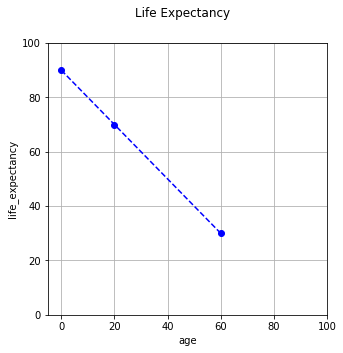

In [11]:
fig, axes = plt.subplots(figsize=(5,5))
x = [0,20,60]
y = [90, 70, 30]
axes.plot(x,y, color='blue', linestyle='--', marker='o')
fig.suptitle('Life Expectancy')
axes.set_xlabel('age')
axes.set_xlim([-5,100])
axes.set_ylabel('life_expectancy')
axes.set_ylim([0,100])
plt.grid()
plt.show()

The linear relationship between age and life expectancy according to our fictitious data

### WHO Mortality Data

In [13]:
who_list = pd.read_csv('http://apps.who.int/gho/athena/data/GHO/WHOSIS_000001,WHOSIS_000015?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=verbose&format=csv')

who_list.to_csv('WHOIS_data.csv')


In [16]:
who_list.head()

,GHO (CODE),GHO (DISPLAY),GHO (URL),PUBLISHSTATE (CODE),PUBLISHSTATE (DISPLAY),PUBLISHSTATE (URL),YEAR (CODE),YEAR (DISPLAY),YEAR (URL),REGION (CODE),...,SEX (CODE),SEX (DISPLAY),SEX (URL),Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,WHOSIS_000015,Life expectancy at age 60 (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2002,2002,NaN,AFR,...,FMLE,Female,NaN,15.5,15.50821,NaN,NaN,NaN,NaN,NaN
1,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2005,2005,NaN,AFR,...,FMLE,Female,NaN,57.1,57.07021,NaN,NaN,NaN,NaN,NaN
2,WHOSIS_000015,Life expectancy at age 60 (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2008,2008,NaN,AFR,...,MLE,Male,NaN,15.6,15.57488,NaN,NaN,NaN,NaN,NaN
3,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2011,2011,NaN,AFR,...,MLE,Male,NaN,58.9,58.90235,NaN,NaN,NaN,NaN,NaN
4,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/indicator-metadat...,PUBLISHED,Published,NaN,2008,2008,NaN,EMR,...,MLE,Male,NaN,59.0,59.00000,NaN,NaN,NaN,NaN,WHO life table method: World Population Prospe...


In [17]:
who_list = who_list[['GHO (DISPLAY)', 'YEAR (CODE)', 'COUNTRY (DISPLAY)', 'SEX (DISPLAY)','Numeric']]

who_list['COUNTRY (DISPLAY)'] = [ctry.title() for ctry in who_list['COUNTRY (DISPLAY)'].values]

who_list[who_list['COUNTRY (DISPLAY)'] == 'India'].head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,GHO (DISPLAY),YEAR (CODE),COUNTRY (DISPLAY),SEX (DISPLAY),Numeric
260,Life expectancy at birth (years),2002,India,Male,62.70160
261,Life expectancy at birth (years),2005,India,Male,63.87052
262,Life expectancy at birth (years),2004,India,Female,64.63663
263,Life expectancy at birth (years),2001,India,Both sexes,62.85001
672,Life expectancy at birth (years),2007,India,Female,65.93420
673,Life expectancy at birth (years),2016,India,Female,70.33931
674,Life expectancy at birth (years),2012,India,Both sexes,67.48958
1080,Life expectancy at birth (years),2011,India,Male,66.06249
1081,Life expectancy at birth (years),2014,India,Male,66.85132
1082,Life expectancy at birth (years),2010,India,Female,67.62952


The life expectancy of a new born male in the India, is 66 years, while a 60-year-old male in the India using the latest data is 10 years which totals 70 years, what gives? That’s one of the complexities of statistics, taking averages for a sixty-year-old implies that this person already survived 60 years, this is called Survivorship bias. And what it means for us here, is that the model will be slightly pessimistic for those closer to zero and slightly optimistic for those closer to 60.

In [18]:
country ='India'
sex = 'Male'
# pull latest entries for birth and 60 years for a country and gender
sub_set = who_list[who_list['COUNTRY (DISPLAY)'].str.startswith(country, na=False)]
sub_set = sub_set[sub_set['SEX (DISPLAY)'] == sex]

# sort by year in descending order to work with the latest read
sub_set = sub_set.sort_values('YEAR (CODE)', ascending=False)
sub_set_birth = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at birth (years)']
sub_set_60 = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at age 60 (years)']

print('sub_set_birth:')
print(sub_set_birth.head())
print('sub_set_60:')
print(sub_set_60.head())




sub_set_birth:
                          GHO (DISPLAY)  YEAR (CODE) COUNTRY (DISPLAY)  \
16235  Life expectancy at birth (years)         2016             India   
7501   Life expectancy at birth (years)         2015             India   
1081   Life expectancy at birth (years)         2014             India   
15429  Life expectancy at birth (years)         2013             India   
7109   Life expectancy at birth (years)         2012             India   

      SEX (DISPLAY)   Numeric  
16235          Male  67.43705  
7501           Male  67.13872  
1081           Male  66.85132  
15429          Male  66.56700  
7109           Male  66.33167  
sub_set_60:
                           GHO (DISPLAY)  YEAR (CODE) COUNTRY (DISPLAY)  \
4147   Life expectancy at age 60 (years)         2016             India   
11643  Life expectancy at age 60 (years)         2015             India   
11642  Life expectancy at age 60 (years)         2014             India   
4561   Life expectancy at age 60 (ye

#### Let’s pull the two latest data points from the WHO data set and plot it out:`

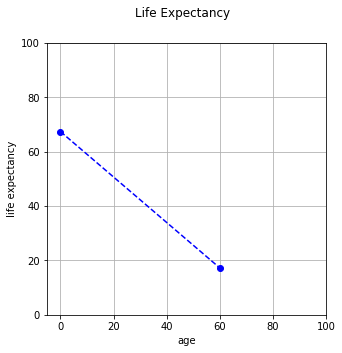

In [22]:
lf_at_birth = sub_set_birth['Numeric'].values[0]
lf_at_60 = sub_set_60['Numeric'].values[0]

age = [0,60]
life_expectancy = [lf_at_birth, lf_at_60]
fig, axes = plt.subplots(figsize=(5,5))
x = age
y = life_expectancy

axes.plot(x, y, color='blue', linestyle='--', marker='o')
fig.suptitle('Life Expectancy')
axes.set_xlim(-5, 100)
axes.set_ylim(0, 100)
axes.set_xlabel('age')
axes.set_ylabel('life expectancy')

plt.grid()
plt.show()


In [23]:
# my life expectancy model
slope, intercept, r_value, p_value, std_err = stats.linregress(age, life_expectancy)
print('intercept: ', intercept)
print('slope: ', slope)

# predicting the life expecctncy of a 25 year old in INdia
np.ceil(slope * 25 + intercept)

intercept:  67.43705
slope:  -0.8365968333333335


47.0

47 f** *** more years, ** **** ** *** **  *** *****! Now, let’s wrap all the above code into a function so we can easily predict other ages with other parameters (and this will make our lives much easier when we port this out to Flask).

In [24]:
def get_life_expectancy(age, country, sex):
    # pull latest entries for birth and 60 years
    sub_set = who_list[who_list['COUNTRY (DISPLAY)'].str.startswith(country, na=False)]
    sub_set = sub_set[sub_set['SEX (DISPLAY)'] == sex]
    sub_set = sub_set.sort_values('YEAR (CODE)', ascending=False)
    sub_set_birth = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at birth (years)']
    sub_set_60 = sub_set[sub_set['GHO (DISPLAY)'] == 'Life expectancy at age 60 (years)']
    
    # not all combinations exists so check that we have daata for both
    if len(sub_set_birth['Numeric']) > 0  and len(sub_set_60['Numeric']) > 0:
        lf_at_birth = sub_set_birth['Numeric'].values[0]
        lf_at_60 = sub_set_60['Numeric'].values[0]
        
        #model
        
        slope, intercept, r_value, p_value, std_err = stats.linregress([0,60],[lf_at_birth,lf_at_60])
        
        return(np.ceil(slope * age + intercept))
    else:
        return None
    
    
    
    

In [35]:
with_i = list(filter(lambda x: x.startswith('I'), list(set(who_list['COUNTRY (DISPLAY)']))))

In [36]:
with_i[0:5]

['India', 'Israel', 'Ireland', 'Italy', 'Iceland']

In [37]:
# test the functions out using a 30-year-old Indian male:
get_life_expectancy(30, 'India', 'Male')

43.0

In [38]:
# heading on to pythonanywhere